In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flags = [i for i in dir(cv) if i.startswith('MORPH_')]
flags

['MORPH_BLACKHAT',
 'MORPH_CLOSE',
 'MORPH_CROSS',
 'MORPH_DILATE',
 'MORPH_ELLIPSE',
 'MORPH_ERODE',
 'MORPH_GRADIENT',
 'MORPH_HITMISS',
 'MORPH_OPEN',
 'MORPH_RECT',
 'MORPH_TOPHAT']

In [4]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [5]:
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [6]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

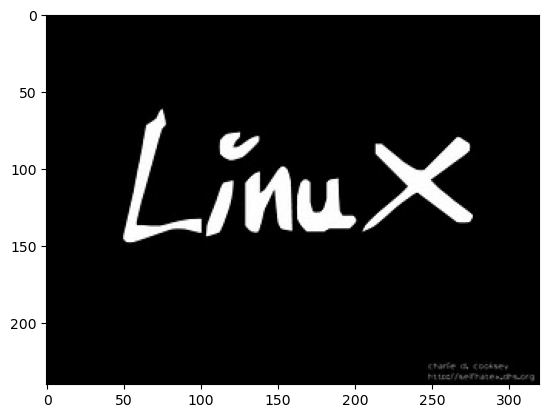

In [7]:
img = cv.imread('../samples/LinuxLogo.jpg')
plt.imshow(img)

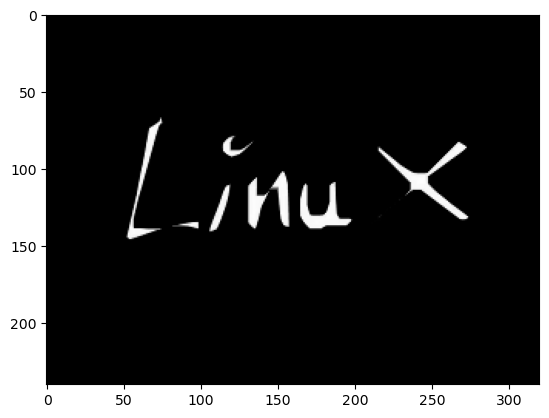

In [8]:
kernal = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernal,iterations = 1)
plt.imshow(erosion)

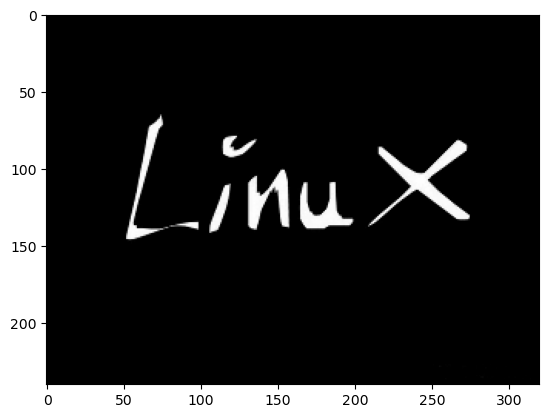

In [11]:
kernal = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
erosion = cv.erode(img,kernal,iterations = 1)
plt.imshow(erosion)

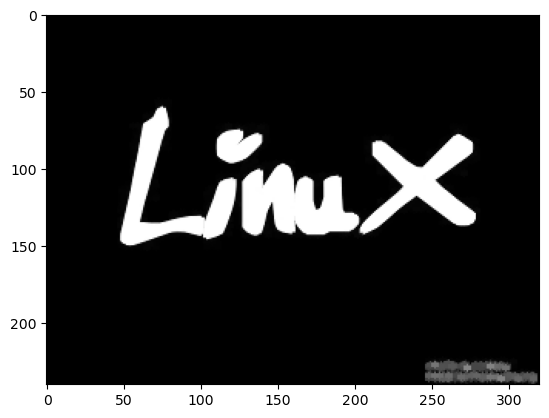

In [14]:
kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
erosion = cv.dilate(img,kernal,iterations = 1)
plt.imshow(erosion)

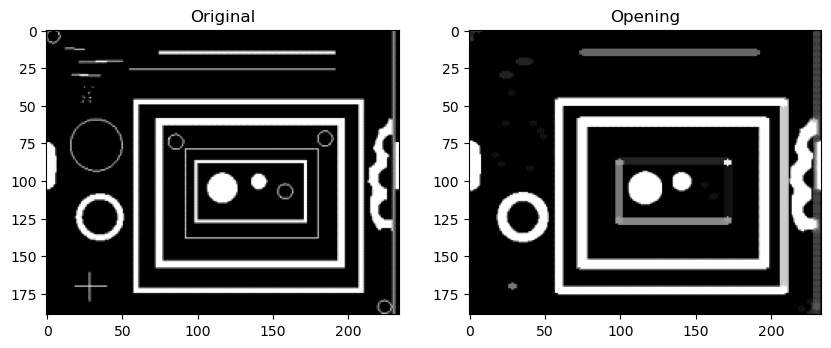

In [31]:
# Opening

plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Original')
ax2 = plt.subplot(1,2,2)
ax2.set_title('Opening')

img = cv.imread('../samples/LinuxLogo.jpg')
opening_img = cv.imread('./opening.png')

def opening(img):
    # 침식
    kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    erosion = cv.erode(img,kernal,iterations = 1)
    # 팽창
    kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    dilation = cv.dilate(erosion,kernal,iterations = 1)
    return dilation

opening = opening(opening_img)
ax1.imshow(opening_img)
ax2.imshow(opening)

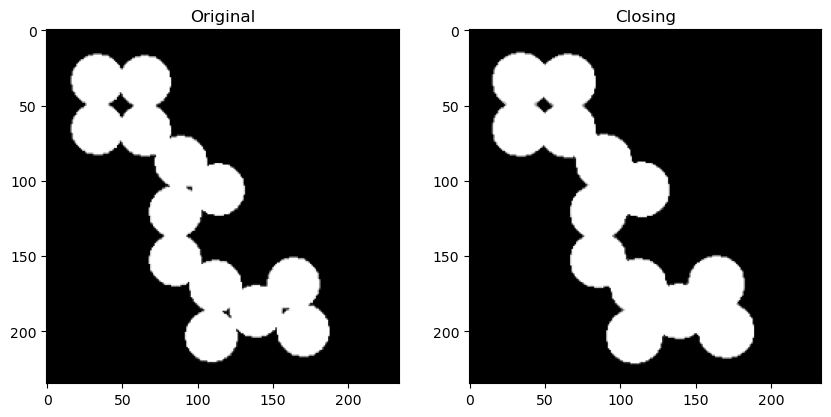

In [32]:
# Closing

plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Original')
ax2 = plt.subplot(1,2,2)
ax2.set_title('Closing')

img = cv.imread('../samples/LinuxLogo.jpg')
closing_img = cv.imread('./closing.png')

def closing(img):
    # 팽창
    kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    dilation = cv.dilate(img,kernal,iterations = 1)
    # 침식
    kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    erosion = cv.erode(dilation,kernal,iterations = 1)
    return erosion

closing = closing(closing_img)
ax1.imshow(closing_img)
ax2.imshow(closing)

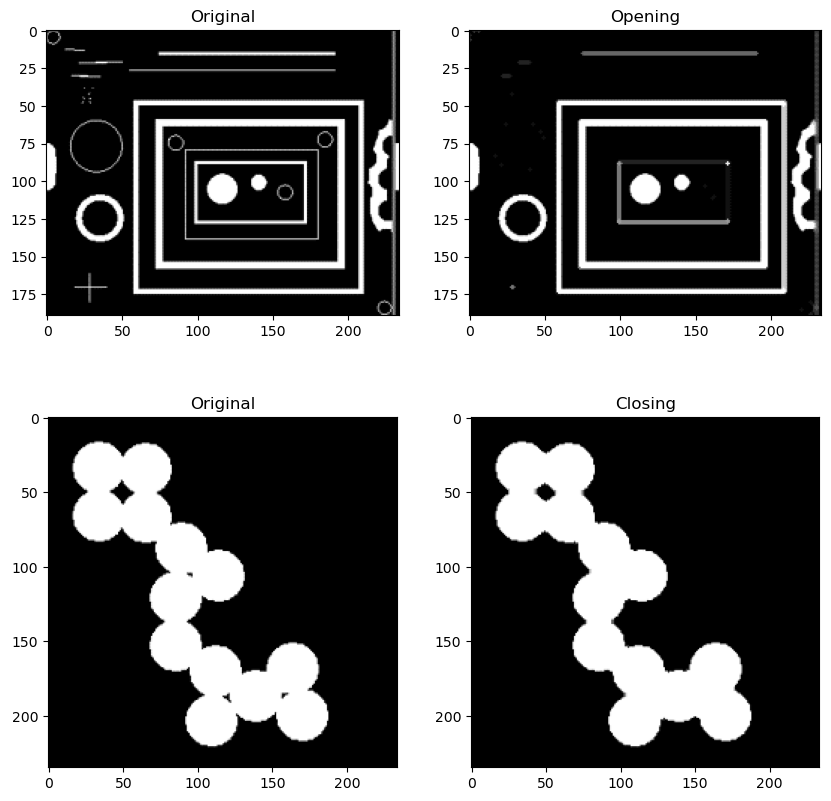

In [35]:
opening_img = cv.imread('./opening.png')
closing_img = cv.imread('./closing.png')

kernal_opening = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
kernal_closing = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

opening = cv.morphologyEx(opening_img, cv.MORPH_OPEN, kernal_opening)
closing = cv.morphologyEx(closing_img, cv.MORPH_CLOSE, kernal_closing)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.set_title('Original')
ax2.set_title('Opening')
ax3.set_title('Original')
ax4.set_title('Closing')

ax1.imshow(opening_img)
ax2.imshow(opening)
ax3.imshow(closing_img)
ax4.imshow(closing)